In [1]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/Users/yashmahajan/Desktop/DSBDA Lab/Datasets/DSBDAL-Exam-datasets/3-4. AcademicPerformance.csv')
df


,Rollno,Marks,Gender,Age,PhD
0,1,140.0,1,47.0,Yes
1,2,30.0,0,65.0,Yes
2,3,35.1,0,56.0,No
3,4,30.0,1,23.0,No
4,5,80.0,0,NaN,Yes
...,...,...,...,...,...
95,96,18.6,1,26.0,No
96,97,152.0,1,56.0,Yes
97,98,1.8,1,28.0,No
98,99,35.0,0,44.0,NaN


In [2]:
df.isnull().sum()

Rollno     0
Marks      0
Gender     0
Age       16
PhD       13
dtype: int64

In [3]:
df['Age'].fillna(value=df['Age'].mean(),inplace=True)
df.fillna("null",inplace=True)
df.isnull().sum()

Rollno    0
Marks     0
Gender    0
Age       0
PhD       0
dtype: int64

In [4]:
outliers = []
def detect(df):
    threshold = 3
    mean = np.mean(df)
    std = np.std(df)
    
    for d in df:
        z_score = (d-mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(d)
    return outliers

In [5]:
var='Marks'

In [6]:
z_scores=detect(df[var])
outliers=df[df[var].isin(z_scores)]
outliers

,Rollno,Marks,Gender,Age,PhD
18,19,190.0,1,66.0,Yes


In [7]:
dfs = df[~df.index.isin(outliers.index)]
#df2=df[var].drop(df[var][df[var].isin(z_scores)])
dfs

,Rollno,Marks,Gender,Age,PhD
0,1,140.0,1,47.000000,Yes
1,2,30.0,0,65.000000,Yes
2,3,35.1,0,56.000000,No
3,4,30.0,1,23.000000,No
4,5,80.0,0,47.821429,Yes
...,...,...,...,...,...
95,96,18.6,1,26.000000,No
96,97,152.0,1,56.000000,Yes
97,98,1.8,1,28.000000,No
98,99,35.0,0,44.000000,null


In [8]:
dfs.skew(axis =0)

/var/folders/4x/j959fgmn17911kmh3xwyp4lm0000gn/T/ipykernel_16509/4029879126.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfs.skew(axis =0)


Rollno   -0.020245
Marks     0.958305
Gender    0.020515
Age      -0.246740
dtype: float64

array([[<AxesSubplot:title={'center':'Rollno'}>,
        <AxesSubplot:title={'center':'Marks'}>],
       [<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Age'}>]], dtype=object)

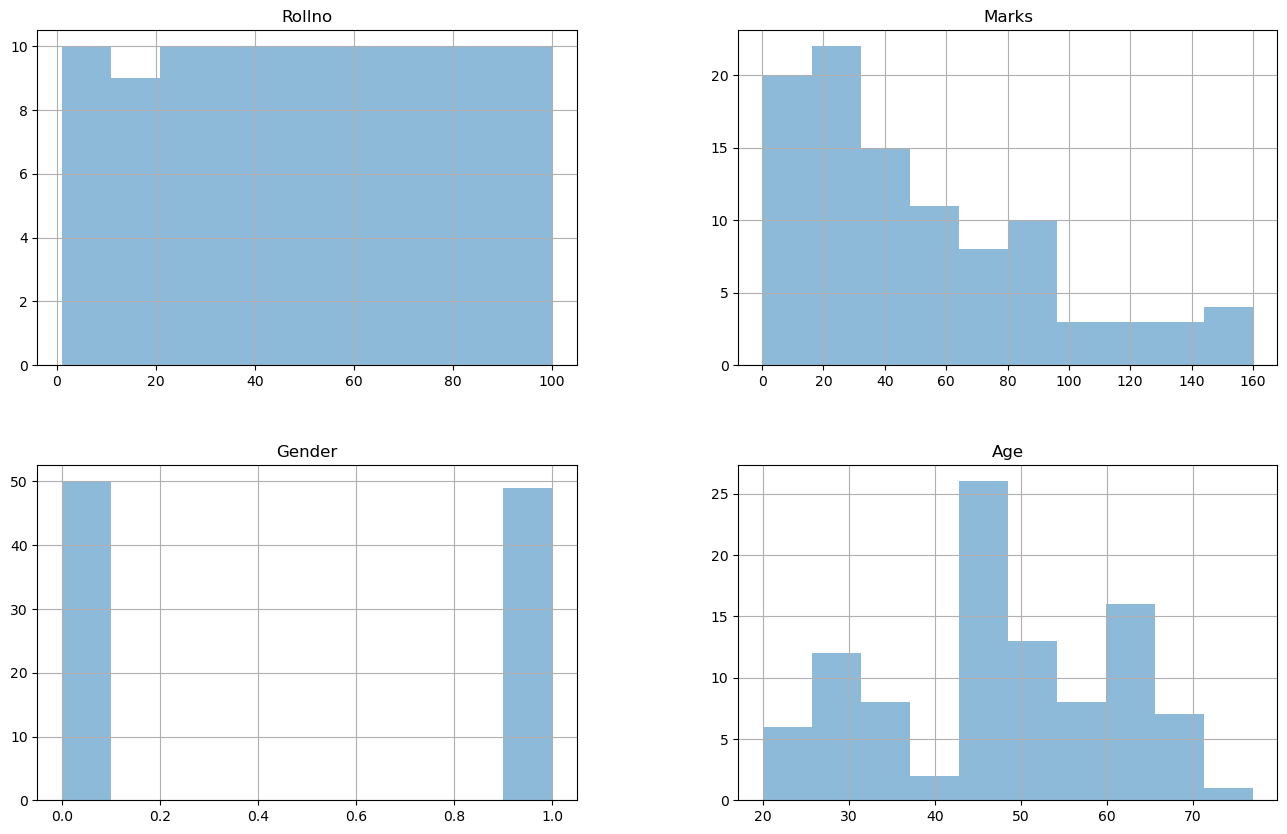

In [9]:
dfs.hist(alpha=0.5, figsize=(16, 10))

<AxesSubplot:xlabel='Marks', ylabel='Density'>

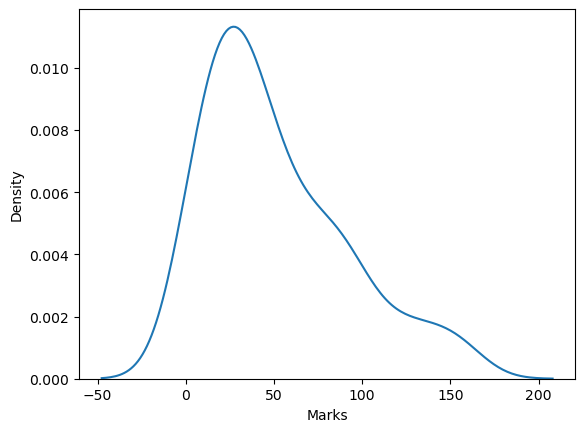

In [10]:
sns.kdeplot(dfs['Marks'])

<AxesSubplot:xlabel='Marks', ylabel='Density'>

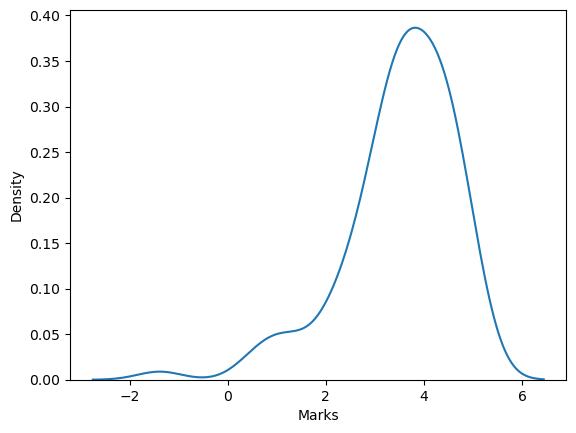

In [11]:
a = np.log(dfs['Marks'])

a.skew(axis=0)

sns.kdeplot(a)

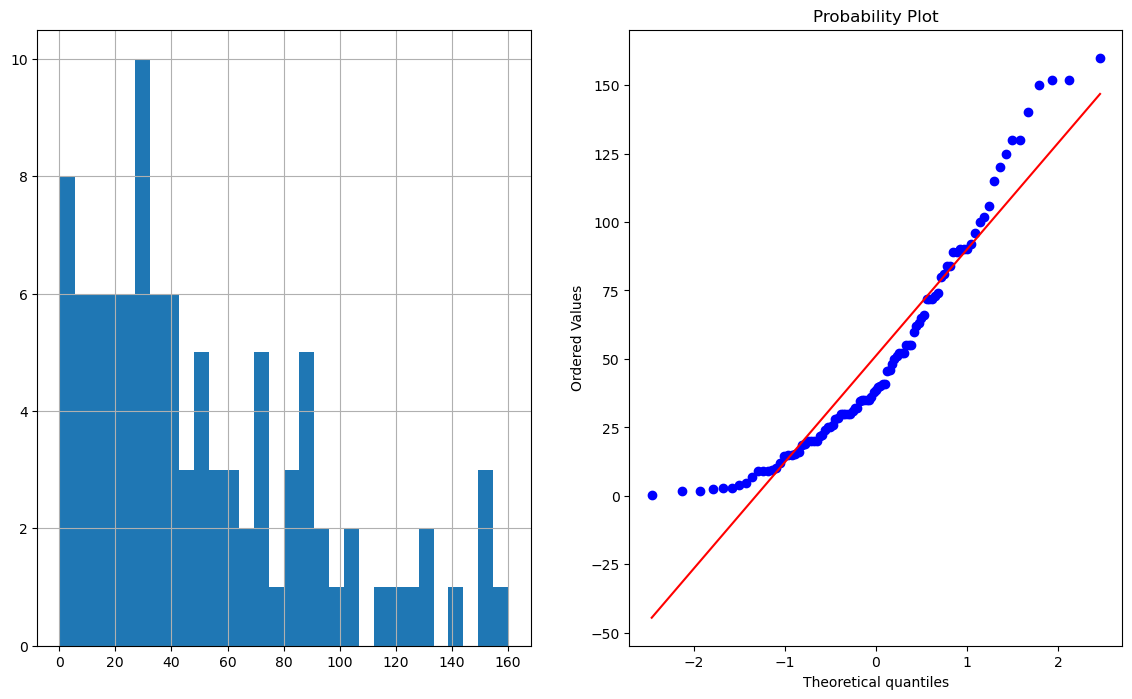

In [12]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1) ## means 1 row , 2 columns and 1st plot
dfs['Marks'].hist(bins=30)

plt.subplot(1,2,2)
stats.probplot(dfs['Marks'], dist="norm", plot=plt)
plt.show()

<AxesSubplot:xlabel='Marks', ylabel='Density'>

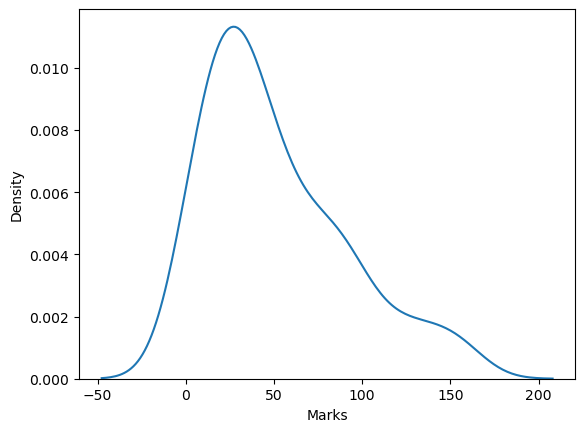

In [13]:
sns.kdeplot(dfs['Marks'])